# Library

In [1]:
# My library
from molgraph.dataset import *
from molgraph.experiment import *
# General library
import argparse
import os as os
import numpy as np
import pickle as pickle

/opt/anaconda3/envs/moleculegraph38/lib/python3.8/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


# Molecular Graph

In [2]:
reducedgraph = ['atom']
reducedgraph = ['atom', 'pharmacophore', 'junctiontree', 'functional']

parser = ArgumentParser()
args = parser.getArgument('''
--file bbbp
--model GIN
--schema A
--reduced 
--mol_embedding 256
--batch_normalize
--fold 5
--seed 42
'''.split())

In [3]:
file = args.file
smiles = args.smiles
task = args.task
splitting = args.splitting
splitting_fold = args.fold
splitting_seed = args.splitting_seed

In [4]:
datasets = getDataset(file, smiles, task, splitting)

Function: getDataset()
number of valid smiles: 2019


In [5]:
datasets_splitted = generateDatasetSplitting(file, splitting, splitting_fold, splitting_seed)

scaffold ScaffoldSplitter


[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not removing hydrogen atom without neighbors
[12:28:05] WARNING: not r

Function: generateDatasetSplitting()
Fold: 5
Fold Number: 0
-- Datasets Train: 1292
-- Datasets Val: 323
-- Datasets Test:  404
-- Total: 2019
Fold Number: 1
-- Datasets Train: 1292
-- Datasets Val: 323
-- Datasets Test:  404
-- Total: 2019
Fold Number: 2
-- Datasets Train: 1292
-- Datasets Val: 323
-- Datasets Test:  404
-- Total: 2019
Fold Number: 3
-- Datasets Train: 1292
-- Datasets Val: 323
-- Datasets Test:  404
-- Total: 2019
Fold Number: 4
-- Datasets Train: 1292
-- Datasets Val: 323
-- Datasets Test:  404
-- Total: 2019


[12:28:08] WARNING: not removing hydrogen atom without neighbors


In [6]:
datasets_graph = generateGraphDataset(file)

Function: generateGraphDataset()
Datasets graph:  1965


In [7]:
# generateVocabTrain(file, splitting_fold, vocab_len=len(datasets_graph)//10)

In [8]:
dict_reducedgraph_all = dict()
for r in reducedgraph:
    print('===',r,'===')
    dict_reducedgraph = generateReducedGraphDict(file, r, vocab_file=file+'_0')
    dict_reducedgraph_all[r] = dict_reducedgraph

=== atom ===
=== pharmacophore ===
=== junctiontree ===
=== functional ===


In [9]:
atom_list = list()
for r in dict_reducedgraph_all:
    substructure_atom_list = list()
    for d in dict_reducedgraph_all[r]:
        substructure_atom_list.append(dict_reducedgraph_all[r][d][0].x_r.shape[0])
    atom_list.append(substructure_atom_list)


In [10]:
max_node = 0
min_node = 999
for r, a in zip(reducedgraph, atom_list):
    print(r)
    print('- mean', np.mean(a), np.std(a))
    print('- max', np.max(a))
    print('- min', np.min(a))
    max_node = np.max(a) if np.max(a) > max_node else max_node
    min_node = np.min(a) if np.min(a) < min_node else min_node

atom
- mean 24.223409669211197 10.665320919128412
- max 132
- min 2
pharmacophore
- mean 20.003562340966923 10.574273236743004
- max 128
- min 1
junctiontree
- mean 14.911450381679389 8.074985480931723
- max 85
- min 1
functional
- mean 11.914503816793893 6.252760678484563
- max 64
- min 1


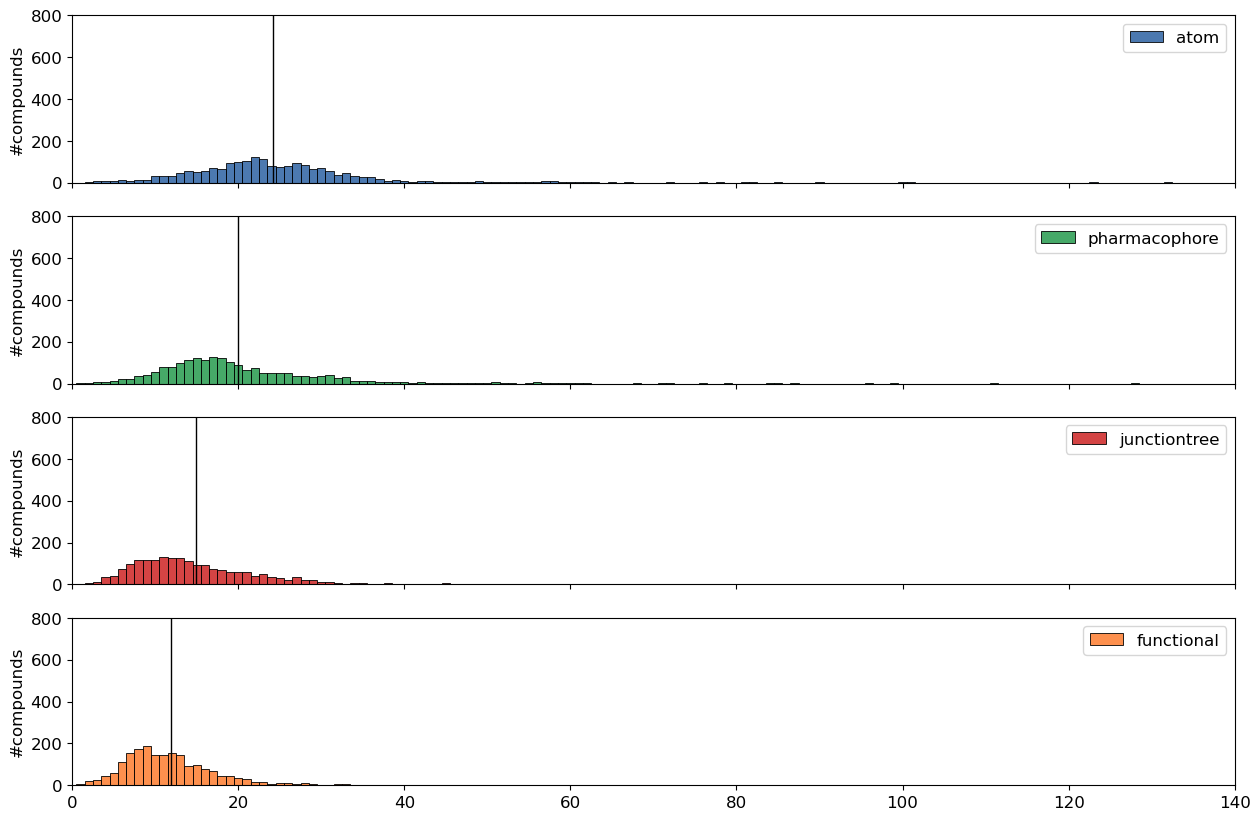

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

colors = {'atom': '#104C96',
          'junctiontree': '#C60505',
          'cluster': '#E26AB0',
          'functional': '#FD6B12',
          'pharmacophore': '#088D36',
          'substructure': '#8B50C9'}
          #F4D53B yellow

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(15,10))
for i, a in enumerate(atom_list):
    sns.histplot(a, bins=range(1, 110, 1), ax=ax[i], kde=False, legend=False, discrete=True,
                 label=reducedgraph[i], color=colors[reducedgraph[i]])
    ax[i].axvline(x=np.mean(a), linewidth=1, color='black')
    ax[i].set_ylabel('#compounds')
    ax[i].set_xlim([0, np.ceil(max_node / 10) * 10])
    ax[i].set_ylim([0, 800])
    ax[i].legend()

In [12]:
batch_size = 265
fold_number = 0
train_loader, val_loader, test_loader, datasets_train, datasets_val, datasets_test = generateDataLoader(file, batch_size, seed=42, fold_number=fold_number)

In [13]:
# visualize dataloader
for _, item in enumerate(train_loader):
    print(_)
    print(item)
    print(getNumberofSmiles(item))
    # print(item.x_g)
    # print(item.edge_index_g)
    # print(item.x_g_batch)
    # print(item.y)
    # break

0
PairDataBatch(smiles=[265], x_g=[6814, 79], x_g_batch=[6814], x_g_ptr=[266], edge_index_g=[2, 14816], edge_attr_g=[14816, 10], y=[265, 1])
265
1
PairDataBatch(smiles=[265], x_g=[6582, 79], x_g_batch=[6582], x_g_ptr=[266], edge_index_g=[2, 14326], edge_attr_g=[14326, 10], y=[265, 1])
265
2
PairDataBatch(smiles=[265], x_g=[6627, 79], x_g_batch=[6627], x_g_ptr=[266], edge_index_g=[2, 14356], edge_attr_g=[14356, 10], y=[265, 1])
265
3
PairDataBatch(smiles=[265], x_g=[6480, 79], x_g_batch=[6480], x_g_ptr=[266], edge_index_g=[2, 14006], edge_attr_g=[14006, 10], y=[265, 1])
265
4
PairDataBatch(smiles=[232], x_g=[5761, 79], x_g_batch=[5761], x_g_ptr=[233], edge_index_g=[2, 12484], edge_attr_g=[12484, 10], y=[232, 1])
232


In [14]:
if args.graphtask == 'classification':
    args.pos_weight = getPosWeight(datasets)
    print('pos_weight:', args.pos_weight)

pos_weight: 0.3025806451612903


In [15]:
y0 = 0
y1 = 0
for g in datasets_graph:
    # print(datasets_graph[g])
    if datasets_graph[g].y == 0:
        y0+=1
    else:
        y1+=1
    # break

print('Positive y1', y1)
print('Negative y0', y0)


Positive y1 1500
Negative y0 465
